<a href="https://colab.research.google.com/github/joybratas1/Credit-Card-Fraud-Project/blob/main/Feature_Selection_steps_CCFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter # counter takes values returns value_counts dictionary
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
import os

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
url_l='https://www.kaggle.com/mlg-ulb/creditcardfraud'
od.download(url_l)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joybratasarkar
Your Kaggle Key: ··········


  8%|▊         | 5.00M/66.0M [00:00<00:01, 44.4MB/s]

100%|██████████| 66.0M/66.0M [00:00<00:00, 76.6MB/s]


In [31]:
file_name='/content/creditcardfraud/creditcard.csv'

In [32]:
df= pd.read_csv(file_name)
df.dataframeName = 'European Credit card Fraud data.csv'
nRow, nCol = df.shape
print('There are {} rows and {} columns in our Dataset'.format(nRow,nCol))

There are 284807 rows and 31 columns in our Dataset


In [33]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
def reduce_memory(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

df = reduce_memory(df)

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 17.11 MB
Decreased by 74.6%


In [35]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,2.848070e+05,284807.000000,284807.000000,284807.000000,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94812.664062,-0.000062,0.000028,NaN,0.000053,0.000163,-0.000033,0.000001,-0.000022,-0.000013,0.000019,0.000021,0.000016,0.000031,0.000010,0.000035,2.384186e-07,0.000044,-0.000005,0.000013,4.768372e-07,0.000008,-0.000054,0.000011,0.000004,0.000068,-0.000007,-7.152557e-07,2.384186e-07,NaN,0.001727
std,47487.195312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.035645e-01,3.300781e-01,NaN,0.041527
min,0.000000,-56.406250,-72.687500,-48.312500,-5.683594,-113.750000,-26.156250,-43.562500,-73.187500,-13.437500,-24.593750,-4.796875,-18.687500,-5.792969,-19.218750,-4.500000,-1.413281e+01,-25.156250,-9.500000,-7.214844,-5.450000e+01,-34.843750,-10.929688,-44.812500,-2.835938,-10.296875,-2.605469,-2.256250e+01,-1.542969e+01,0.000000,0.000000
25%,54201.500000,-0.920410,-0.598633,-0.890137,-0.848633,-0.691406,-0.768066,-0.554199,-0.208618,-0.643066,-0.535645,-0.762695,-0.405518,-0.648438,-0.425537,-0.583008,-4.680176e-01,-0.483643,-0.498779,-0.456299,-2.116699e-01,-0.228394,-0.542480,-0.161865,-0.354492,-0.317139,-0.326904,-7.086182e-02,-5.294800e-02,5.601562,0.000000
50%,84692.000000,0.018112,0.065491,0.179810,-0.019852,-0.054321,-0.274170,0.040100,0.022354,-0.051422,-0.092896,-0.032745,0.140015,-0.013565,0.050598,0.048065,6.640625e-02,-0.065674,-0.003635,0.003735,-6.246948e-02,-0.029449,0.006783,-0.011192,0.040985,0.016586,-0.052124,1.341820e-03,1.124573e-02,22.000000,0.000000
75%,139320.500000,1.315430,0.803711,1.027344,0.743164,0.611816,0.398682,0.570312,0.327393,0.597168,0.453857,0.739746,0.618164,0.662598,0.493164,0.648926,5.234375e-01,0.399658,0.500977,0.458984,1.330566e-01,0.186401,0.528320,0.147583,0.439453,0.350830,0.240967,9.106445e-02,7.830811e-02,77.187500,0.000000
max,172792.000000,2.455078,22.062500,9.382812,16.875000,34.812500,73.312500,120.562500,20.000000,15.593750,23.750000,12.015625,7.847656,7.125000,10.523438,8.875000,1.731250e+01,9.250000,5.042969,5.593750,3.940625e+01,27.203125,10.500000,22.531250,4.585938,7.519531,3.517578,3.160938e+01,3.384375e+01,25696.000000,1.000000


In [36]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173966e-01,-1.059386e-02,-4.196158e-01,-1.052602e-01,1.730723e-01,-6.301569e-02,8.471457e-02,-3.695025e-02,-8.661346e-03,3.061647e-02,-2.476896e-01,1.243487e-01,-6.590148e-02,-9.875604e-02,-1.834527e-01,1.190260e-02,-7.329690e-02,9.043759e-02,2.897562e-02,-5.086558e-02,4.473570e-02,1.440578e-01,5.114226e-02,-1.618170e-02,-2.330827e-01,-4.140648e-02,-5.133451e-03,-9.412160e-03,-0.010596,-0.012323
V1,0.117397,1.000000e+00,-1.112393e-07,7.008953e-06,-2.180993e-06,4.549533e-06,-1.019140e-06,2.178623e-06,-1.520636e-06,7.745853e-07,1.703908e-06,-1.435543e-06,-3.161651e-07,-9.773863e-09,2.950044e-06,2.539719e-07,1.611774e-06,1.012098e-06,1.131462e-06,1.046430e-06,2.798551e-06,1.233829e-06,3.446954e-06,9.401318e-06,-3.941533e-07,1.924782e-06,4.414856e-07,-3.995493e-06,5.262035e-06,-0.227713,-0.101348
V2,-0.010594,-1.112393e-07,1.000000e+00,-3.078784e-06,1.751105e-06,3.805664e-07,-1.919690e-06,-6.485411e-07,-1.970317e-06,-7.965476e-07,-2.868107e-06,1.016257e-06,-1.027289e-06,-2.327094e-07,-1.367525e-06,3.470079e-07,-2.136910e-06,-2.749514e-06,-1.029321e-06,-2.977197e-07,4.338788e-06,2.074810e-06,-2.705048e-06,6.514719e-06,-4.964027e-07,1.147010e-06,-8.943206e-07,4.664764e-06,1.385259e-06,-0.531405,0.091291
V3,-0.419616,7.008953e-06,-3.078784e-06,1.000000e+00,-1.478797e-06,3.339118e-06,1.261018e-07,1.044687e-05,-6.277743e-06,3.982830e-07,8.268171e-07,-6.394558e-07,1.886818e-07,-5.742658e-07,3.575047e-06,-2.984010e-07,4.794385e-06,1.319697e-06,1.467008e-06,5.007630e-08,1.121941e-06,1.765072e-06,3.724977e-06,1.206940e-06,-3.440800e-07,-4.042681e-08,-2.146131e-07,-8.696855e-07,-1.589571e-06,-0.210879,-0.192962
V4,-0.105260,-2.180993e-06,1.751105e-06,-1.478797e-06,1.000000e+00,-3.429088e-07,2.153832e-06,-3.571908e-06,1.959925e-06,-7.346730e-07,-3.243570e-07,1.032136e-06,-6.380747e-07,-3.536948e-08,-1.218897e-06,4.775727e-08,-2.319529e-06,-1.189529e-06,-9.582311e-07,7.149099e-07,6.960228e-08,-9.191688e-07,1.389861e-07,-1.734143e-06,-2.573497e-07,2.715924e-07,-3.535668e-07,-4.176400e-07,3.005353e-07,0.098732,0.133450
V5,0.173072,4.549533e-06,3.805664e-07,3.339118e-06,-3.429088e-07,1.000000e+00,-5.105982e-06,8.298852e-06,-4.221445e-06,3.864682e-07,2.712246e-06,-1.678225e-06,3.342028e-07,1.663050e-07,3.237135e-06,9.453716e-07,3.921073e-06,-3.040452e-07,-1.046672e-06,8.850301e-07,1.282452e-06,3.774475e-06,1.878910e-06,-2.779055e-06,-1.906704e-06,2.842979e-07,-4.800834e-07,9.755467e-07,-2.056797e-06,-0.386358,-0.094974
V6,-0.063016,-1.019140e-06,-1.919690e-06,1.261018e-07,2.153832e-06,-5.105982e-06,1.000000e+00,-3.108663e-07,1.326054e-06,-2.174231e-06,6.770627e-07,7.783236e-07,-6.101954e-07,-5.656942e-07,-1.230174e-06,-1.216788e-06,-1.659585e-07,4.375169e-09,4.342874e-07,-4.189999e-07,-4.196087e-06,-2.856575e-07,-2.583273e-06,3.196928e-07,4.576558e-07,1.028714e-06,-3.110540e-07,1.118882e-07,4.817306e-07,0.215985,-0.043642
V7,0.084715,2.178623e-06,-6.485411e-07,1.044687e-05,-3.571908e-06,8.298852e-06,-3.108663e-07,1.000000e+00,-1.085786e-06,9.014359e-07,4.055458e-06,-1.735138e-06,3.456862e-06,-1.144208e-06,5.198175e-06,-1.323951e-06,1.402715e-06,4.550341e-06,1.960725e-06,-1.368634e-06,-1.988202e-07,5.036131e-06,2.023177e-06,3.755570e-06,-2.120853e-08,-2.337082e-08,4.977541e-07,-1.061273e-05,2.441307e-06,0.397302,-0.187262
V8,-0.036950,-1.520636e-06,-1.970317e-06,-6.277743e-06,1.959925e-06,-4.221445e-06,1.326054e-06,-1.085786e-06,1.000000e+00,-5.900829e-09,-6.305132e-07,5.486232e-07,-1.641372e-06,-1.200133e-07,-5.150214e-06,-4.241268e-07,-1.800495e-06,-3.050821e-07,-2.047111e-06,-9.595121e-08,3.417485e-06,5.426244e-06,5.713532e-06,9.375476e-07,-5.046462e-07,-4.220161e-07,1.204087e-06,3.775128e-06,8.225930e-07,-0.103078,0.019881
V9,-0.008661,7.745853e-07,-7.965476e-07,3.982830e-07,-7.346730e-07,3.864682e-07,-2.174231e-06,9.014359e-07,-5.900829e-09,1.000000e+00,-8.269634e-07,1.713292e-08,2.389871e-07,6.435872e-07,5

In [38]:
vc = df['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(df), 2))
#vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})

print('No Frauds Cases are ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset i.e.', vc.iloc[0,1])
print('Frauds Cases are', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset i.e.', vc.iloc[1,1])

No Frauds Cases are  99.83 % of the dataset i.e. 284315
Frauds Cases are 0.17 % of the dataset i.e. 492


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



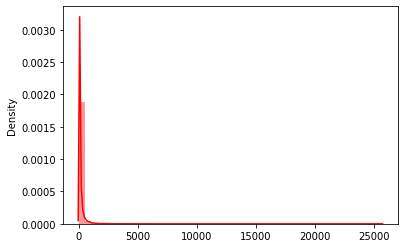

In [37]:
amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, color='r')
#ax.set_title('Distribution of Transaction Amount', fontsize=14)
#ax[0].set_xlim([min(amount_val), max(amount_val)])

## Checking the Importance of Time Distributrion wrt Class

In [39]:
#Fraudlent Dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



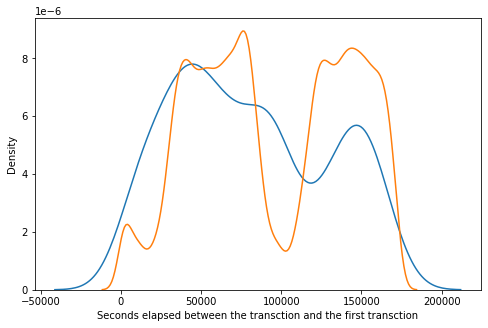

In [40]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.
Hence, we can drop the `Time` column.

In [41]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Removing Outliers using **Winsorization**
 Most of the outliers are present in the Amount Column

 ### Outlier removal Causing significant drop in performance


In [ ]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 0.1)
    q3 = np.percentile(df , 99.9)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(df['Amount'])
len(out)

Outliers: [3828.0, 7712.0, 3668.0, 4002.0, 3996.0, 4000.0, 6132.0, 3588.0, 3406.0, 5240.0, 3382.0, 7880.0, 3464.0, 3888.0, 7428.0, 3610.0, 4908.0, 4312.0, 4312.0, 4104.0, 3106.0, 4140.0, 3450.0, 3076.0, 3526.0, 3056.0, 3024.0, 3980.0, 3078.0, 3336.0, 4476.0, 3202.0, 3208.0, 3208.0, 4340.0, 6952.0, 4000.0, 3822.0, 4456.0, 3418.0, 3180.0, 3820.0, 6668.0, 3604.0, 4276.0, 3680.0, 3466.0, 12912.0, 4584.0, 3424.0, 5116.0, 4008.0, 6512.0, 3500.0, 4628.0, 5680.0, 4024.0, 3200.0, 4112.0, 3050.0, 11896.0, 5132.0, 3684.0, 4080.0, 5936.0, 7636.0, 3254.0, 19664.0, 3168.0, 3118.0, 5448.0, 5340.0, 4276.0, 4276.0, 3468.0, 3616.0, 3546.0, 3292.0, 3208.0, 4900.0, 5656.0, 3318.0, 4248.0, 3034.0, 3692.0, 3348.0, 4652.0, 3938.0, 3114.0, 3882.0, 3728.0, 3386.0, 5260.0, 8792.0, 3692.0, 3042.0, 4112.0, 3770.0, 5316.0, 3606.0, 3516.0, 3170.0, 4280.0, 3850.0, 3364.0, 4336.0, 4352.0, 4100.0, 6000.0, 3480.0, 3106.0, 4002.0, 3804.0, 3930.0, 3746.0, 3308.0, 6240.0, 4064.0, 3232.0, 3210.0, 5304.0, 3152.0, 3032.0, 47

284

In [ ]:
#df.loc[df.apply(lambda x: x.Amount in out, axis=1)]
df= df[~df['Amount'].isin(out)]     #To get only the columns with removed Amount Outliers
df.shape

(284523, 30)

### Splitting the Data

Before sampling and scaling we need to convert it

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100,stratify=y)

### Feature Scaling
We need to scale only the `Amount` column as all other columns are already scaled by the PCA transformation.
Done using Robust Scaler

In [44]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()


In [45]:
X_train['Amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))

X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
276544,2.019531,-0.099060,-1.123047,0.461670,-0.167358,-1.240234,0.219849,-0.311279,0.829590,-0.090515,-0.836426,0.263184,-0.536133,0.456299,0.231689,-0.322021,-0.268066,-0.595703,0.176147,-0.260010,-0.253662,-0.625488,0.289551,-0.001698,-0.139893,-0.585938,-0.016449,-0.048065,-0.071716
168089,-0.815918,-0.408203,-1.699219,-0.622070,0.273438,-0.498535,3.472656,-0.622559,-1.340820,-0.738281,0.343750,0.307129,-0.033081,0.944336,-1.416992,-0.429688,-0.626465,0.209351,0.271973,0.940430,0.718750,1.292969,0.696289,-0.340088,0.153442,0.866699,-0.099182,0.199829,6.621094
91651,-1.185547,1.182617,1.567383,-0.001388,-0.005512,-0.770508,0.738281,-0.090759,-0.246582,0.231323,0.611328,0.958984,1.365234,-0.294678,0.969238,-0.375000,-0.064758,-1.189453,-0.559082,0.210815,-0.252686,-0.234619,0.166748,0.623535,-0.245361,0.008331,-0.141479,-0.355225,-0.141235
258071,1.817383,-0.727539,-0.291504,0.459473,-0.895996,-0.273438,-0.683594,0.106567,1.052734,0.166870,0.730469,0.756348,-0.583008,0.108887,-0.273193,0.417236,-0.588867,0.466064,-0.098816,-0.109314,0.287598,0.865723,0.091492,0.070007,-0.322266,0.589355,-0.038666,-0.049530,0.670898
167236,-1.670898,-7.312500,-2.699219,0.667480,-3.021484,0.248047,1.533203,-0.518555,-0.097412,-0.171631,-0.779297,-0.744141,0.065796,0.137939,0.922852,1.761719,0.045166,-0.804688,-0.130981,4.019531,1.234375,-1.047852,-1.350586,0.794434,-1.232422,-0.680664,-0.369873,0.313232,27.687500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194533,-0.917480,0.855469,1.515625,-0.220703,0.747559,0.859375,0.827637,0.281494,0.400879,-1.066406,-2.439453,-0.765137,-1.608398,-0.233643,-1.497070,0.011734,-0.457764,-0.414795,-0.072083,-0.274170,-0.583984,-1.673828,-0.248779,-0.213989,0.609375,-1.054688,-0.068481,0.048981,0.173462
163532,-0.818848,-0.653809,1.685547,-1.561523,0.357422,1.305664,0.371826,-0.086060,-0.349609,0.156616,-0.675293,-1.141602,-0.944336,-0.998047,-0.265625,-0.894043,1.537109,-2.703125,0.337891,0.072693,0.248169,1.356445,-0.603516,-1.038086,0.609863,0.318604,-0.277344,-0.461914,1.102539
47169,0.984375,-0.951660,0.760742,0.729492,-1.429688,-0.353271,-0.542480,-0.063049,-0.419434,0.629883,-0.971191,-0.123718,0.026550,-0.172363,0.361328,-1.416016,-0.041656,1.488281,-1.164062,-0.233032,-0.148315,-0.163452,-0.190674,0.378174,0.456543,-0.239014,0.045746,0.061768,2.070312
138367,0.699707,-1.557617,0.286865,0.349609,-1.519531,-0.535645,-0.117676,-0.177246,-0.468506,0.452393,-0.967285,-0.115479,-0.277588,-0.071106,-0.190430,-1.633789,0.319336,0.736816,-0.609863,0.116943,-0.456787,-1.458984,-0.134644,0.368408,0.086121,0.273682,-0.065369,0.075745,4.429688


We will transform the amount in test data and not fit

In [46]:
X_test['Amount'] = rob_scaler.transform(X_test['Amount'].values.reshape(-1,1))
X_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
203453,1.723633,-0.256104,-1.836914,0.571777,0.073730,-1.210938,0.396484,-0.312744,0.253418,-0.423340,1.522461,0.946289,0.248291,-0.663086,0.182983,0.408691,0.245117,0.999023,-0.242676,0.124451,0.340332,0.805664,-0.156128,0.021500,0.168213,-0.143433,-0.030334,-0.011833,1.791016
89894,-1.100586,0.754395,0.968750,-0.043732,0.379883,-0.238159,-0.036591,0.701660,-0.820312,-0.811035,1.020508,0.100891,-1.046875,0.414307,0.559570,0.526367,0.177490,0.239990,0.056152,-0.095154,-0.072510,-0.580078,-0.019485,-0.381104,-0.402588,0.081543,-0.038055,-0.013443,-0.291016
185377,2.035156,0.298584,-1.951172,1.041016,0.839355,-0.863281,0.712402,-0.344727,-0.393311,0.532715,0.643066,0.766602,-0.089539,0.981934,-0.447998,-0.160889,-0.779785,0.108643,-0.018433,-0.253906,0.156860,0.531250,-0.074463,-0.464600,0.480957,-0.474854,-0.034027,-0.076965,-0.160156
11476,1.332031,-0.680664,0.558594,-0.268799,-1.055664,-0.350830,-0.861328,0.015396,1.178711,0.137939,0.191406,-3.955078,-0.590820,1.446289,-0.725586,0.361816,1.820312,-1.666016,0.389648,-0.153076,-0.164185,-0.230713,0.026840,-0.008553,0.381592,-0.247070,-0.013054,0.000423,-0.029083
227698,2.210938,-1.623047,0.141113,-1.391602,-2.082031,-0.472412,-1.762695,-0.036133,-0.611328,1.458008,-1.060547,-0.478760,0.969727,-1.001953,0.037140,-0.117126,0.299316,0.229980,-0.332031,-0.380127,-0.134888,0.174805,0.332764,0.001655,-0.537109,-0.248901,0.067322,-0.027130,0.039581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56190,-0.807617,0.954590,1.573242,-0.095398,-0.127075,-0.734375,0.541016,0.024597,-0.445068,0.096924,1.409180,0.424805,-0.605957,0.381348,0.213379,0.339844,-0.556641,0.130127,0.244507,0.029465,-0.139648,-0.481201,0.111389,0.497803,-0.266113,0.020096,-0.022034,0.135986,-0.259033
158411,-0.189087,1.093750,-0.536621,-0.453857,1.623047,-0.363770,1.330078,-0.377441,0.277344,-0.570312,1.571289,-2.087891,1.720703,2.332031,-0.724609,-0.857910,0.415283,0.585938,1.335938,-0.037598,0.129761,0.658691,-0.418457,0.242920,0.088074,0.292480,-0.033966,0.119263,0.012901
275143,1.959961,-0.309082,-1.463867,0.103210,0.047791,-0.851562,0.157593,-0.251221,0.171631,0.317627,0.729004,0.731934,0.034149,0.616699,-0.042450,0.332520,-0.834961,0.321777,0.161987,-0.074829,0.273193,0.754395,-0.051575,-0.257324,0.048859,0.781738,-0.104553,-0.074280,0.517090
149922,-0.650391,1.237305,-0.011566,-0.795410,0.929199,-1.409180,1.324219,-0.699707,2.193359,-1.165039,0.496338,-1.930664,2.021484,-0.401123,-2.376953,-0.238525,1.009766,0.080444,-1.853516,-0.255371,0.048157,0.817871,-0.059570,0.280518,-0.782715,-0.678711,-0.225464,0.151733,-0.226562


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



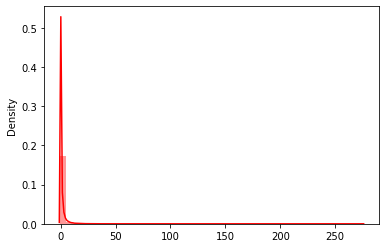

In [47]:
amount_train = X_train['Amount'].values
amount_test = X_test['Amount'].values
sns.distplot(amount_train, color='r')
#sns.distplot(amount_test, color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

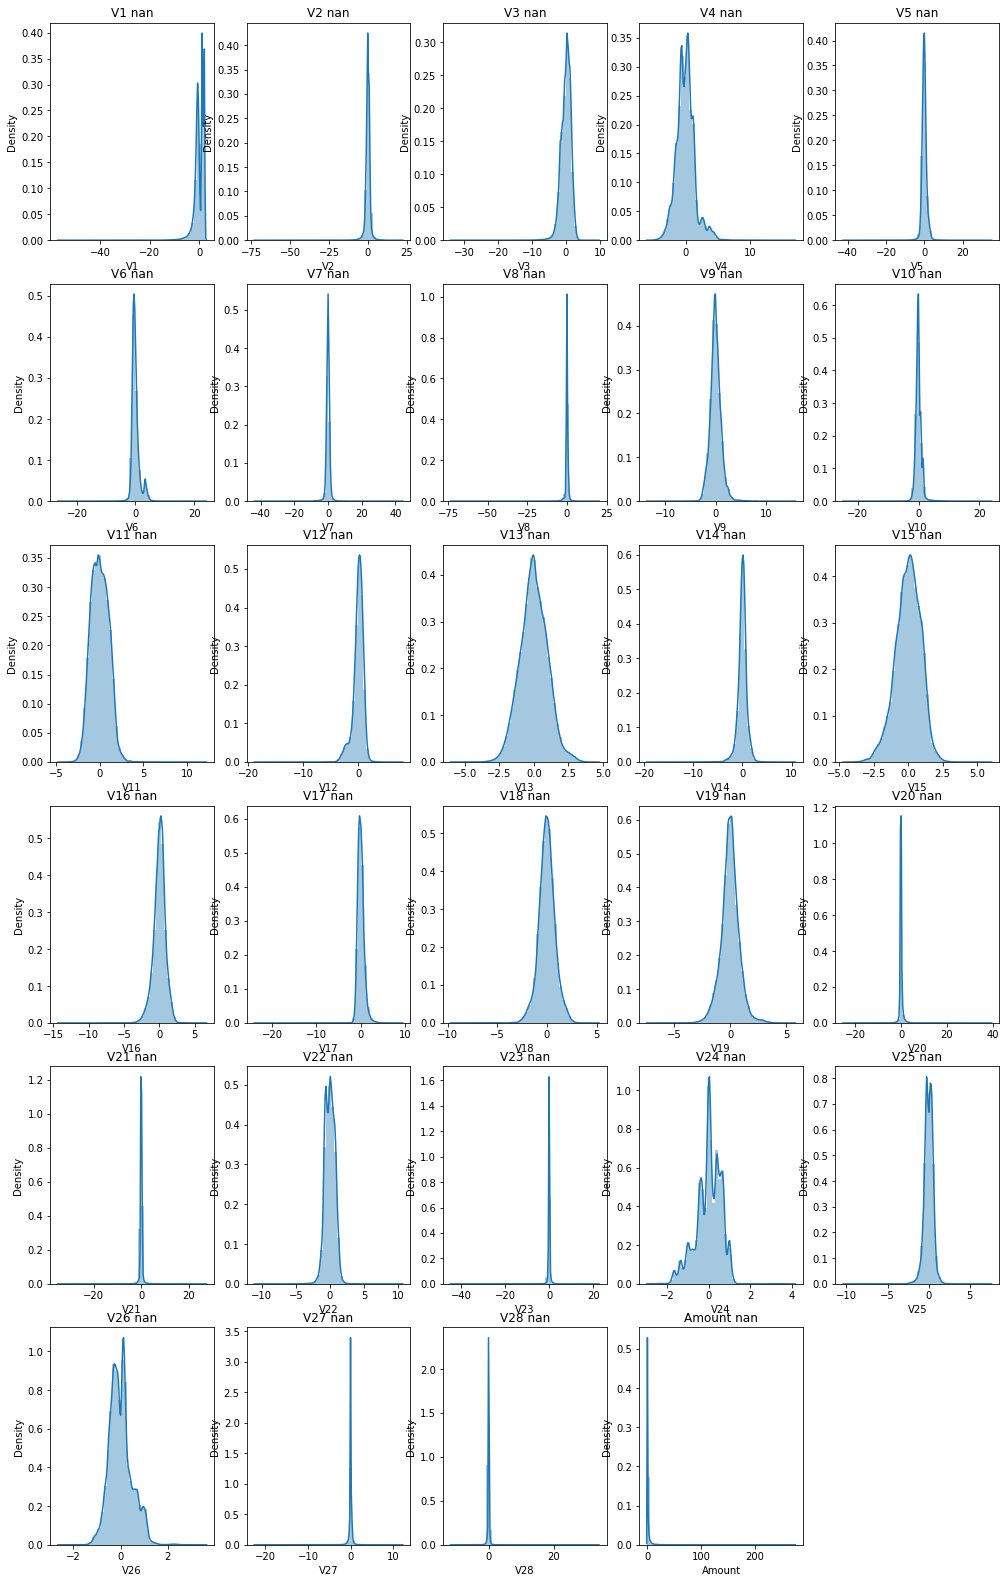

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in X_train.columns :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))
          




SCALING 

FILTER METHOD- CHecking Correlation between the features

In [ ]:
for i in range(0,len(df.columns)):
    for j in  range(0,len(df.columns)):
        if i!=j:
            corr_1=np.abs(df[df.columns[i]].corr(x[x.columns[j]]))
            if corr_1 <0.3:
                print( df.columns[i] , " is not correlated  with ", x.columns[j])
            elif corr_1>0.75:
                print( df.columns[i] , " is highly  correlated  with ", x.columns[j])

V1  is not correlated  with  V2
V1  is not correlated  with  V3
V1  is not correlated  with  V4
V1  is not correlated  with  V5
V1  is not correlated  with  V6
V1  is not correlated  with  V7
V1  is not correlated  with  V8
V1  is not correlated  with  V9
V1  is not correlated  with  V10
V1  is not correlated  with  V11
V1  is not correlated  with  V12
V1  is not correlated  with  V13
V1  is not correlated  with  V14
V1  is not correlated  with  V15
V1  is not correlated  with  V16
V1  is not correlated  with  V17
V1  is not correlated  with  V18
V1  is not correlated  with  V19
V1  is not correlated  with  V20
V1  is not correlated  with  V21
V1  is not correlated  with  V22
V1  is not correlated  with  V23
V1  is not correlated  with  V24
V1  is not correlated  with  V25
V1  is not correlated  with  V26
V1  is not correlated  with  V27
V1  is not correlated  with  V28
V1  is not correlated  with  Amount
V1  is not correlated  with  Class
V2  is not correlated  with  V1
V2  is not cor

We dont find any correlated Feature. (Scaled Values are correlated but that was obvious we will use only the scaled value and not the row Time and Amount)

All Model Import functions

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [49]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

### SMOTE Process

We will use Smote to do our analysis and modelling and finally check the performance

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 33)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Before SMOTE oversampling X_train shape= (213605, 29)
After SMOTE oversampling X_train shape= (426472, 29)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [ ]:
pred_df = LogisticRegression()
logistic_smote= pred_df.fit(X_train_smote, y_train_smote)

# prediction for Training data
y_train_smote_pred = logistic_smote.predict(X_train_smote)

# prediction for Testing data
#test_smote = pred_df.predict(X_test_s)

In [ ]:
confusion = metrics.confusion_matrix(y_train_smote, y_train_smote_pred)
print(confusion)

[[208416   4820]
 [ 14348 198888]]


In [ ]:
print(classification_report(y_train_smote, y_train_smote_pred))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_smote, y_train_smote_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    213236
           1       0.98      0.93      0.95    213236

    accuracy                           0.96    426472
   macro avg       0.96      0.96      0.96    426472
weighted avg       0.96      0.96      0.96    426472

Confusion Matrix - Training Dataset
Predicted       0       1     All
True                             
0          208416    4820  213236
1           14348  198888  213236
All        222764  203708  426472


In [ ]:
y_train_pred_proba_log_smote = logistic_smote.predict_proba(X_train_smote)[:,1]
preds = logistic_smote.predict(X_train_smote)

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
#draw_roc(y_train_smote, y_train_pred_proba_log_smote)

In [ ]:
roc_auc_score(y_train_smote.ravel(), preds)

0.9550544936127108

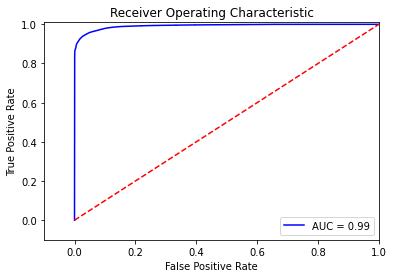

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_smote.ravel(),y_train_pred_proba_log_smote)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
y_test_smote_pred = logistic_smote.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_smote_pred)
print(confusion)

[[69531  1548]
 [   17   106]]


In [ ]:
print(classification_report(y_test, y_test_smote_pred))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test, y_test_smote_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.86      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.92      0.55     71202
weighted avg       1.00      0.98      0.99     71202

Confusion Matrix - Training Dataset
Predicted      0     1    All
True                         
0          69531  1548  71079
1             17   106    123
All        69548  1654  71202


### SVM Classifier Linear

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train_smote, y_train_smote)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
prediction_SVM_y_train = classifier.predict(X_train_smote)

In [ ]:
print(classification_report(y_train_smote, prediction_SVM_y_train))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_smote, prediction_SVM_y_train, rownames = ['True'], colnames = ['Predicted'], margins = True))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96    213236
           1       0.98      0.93      0.95    213236

    accuracy                           0.96    426472
   macro avg       0.96      0.96      0.96    426472
weighted avg       0.96      0.96      0.96    426472

Confusion Matrix - Training Dataset
Predicted       0       1     All
True                             
0          208969    4267  213236
1           14583  198653  213236
All        223552  202920  426472


In [ ]:
y_test_svm_smote = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_svm_smote))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test, y_test_svm_smote, rownames = ['True'], colnames = ['Predicted'], margins = True))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.07      0.88      0.13       123

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202

Confusion Matrix - Training Dataset
Predicted      0     1    All
True                         
0          69673  1406  71079
1             15   108    123
All        69688  1514  71202


In [ ]:
roc_auc_score(y_train_smote.ravel(), prediction_SVM_y_train)

0.955800146316757

In [ ]:
roc_auc_score(y_test.ravel(), y_test_svm_smote)

0.9291339866085108

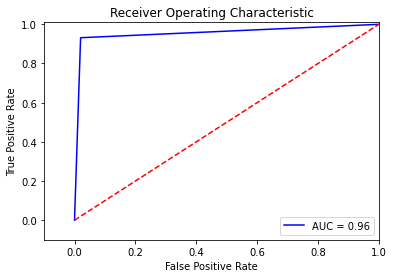

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_smote.ravel(),prediction_SVM_y_train)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SMOTE TOMEK LINKS

In [52]:
pip install smote_variants

     |████████████████████████████████| 134 kB 8.4 MB/s 
  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8592 sha256=e1f5c12cce24f64e5a0a707ba80c9f7c7ed34c4c1e8b4be696ba05f65865c5a8
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7454 sha256=20728b475d923deab9186a23746c9d00b4a806f335ed3c8c9c35e9d96c20f962
  Stored in directory: /root/.cache/pip/wheels/37/09/e1/49ee45c0ce248a6e9c986aae82d32bbcba09c9f3b9d0c3406a
Successfully built minisom statistics


In [51]:
from imblearn.combine import SMOTETomek

In [53]:
sm_tl = SMOTETomek()

In [54]:
tomek = sv.MulticlassOversampling(sv.SMOTE_TomekLinks())

In [56]:
X_train_smote_tomek, y_train_smoke_tomek = sm_tl.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [59]:
print('Resampled dataset shape %s' % Counter(y_train_smoke_tomek))
print('\n Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote_tomek.shape)


Resampled dataset shape Counter({0: 213236, 1: 213236})

 Before SMOTE oversampling X_train shape= (213605, 29)
After SMOTE oversampling X_train shape= (426472, 29)


In [60]:
svm_classifier = svm.SVC(kernel='linear')

In [61]:
svm_classifier.fit(X_train_smote_tomek, y_train_smoke_tomek)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
prediction_SVM_y_train_smote_tomek = svm_classifier.predict(X_train_smote_tomek)

In [63]:
print(classification_report(y_train_smoke_tomek, prediction_SVM_y_train_smote_tomek))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_smoke_tomek, prediction_SVM_y_train_smote_tomek, rownames = ['True'], colnames = ['Predicted'], margins = True))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96    213236
           1       0.98      0.93      0.95    213236

    accuracy                           0.96    426472
   macro avg       0.96      0.96      0.96    426472
weighted avg       0.96      0.96      0.96    426472

Confusion Matrix - Training Dataset
Predicted       0       1     All
True                             
0          209042    4194  213236
1           14950  198286  213236
All        223992  202480  426472
